In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bbri-dataset/BBRI.JK (2).csv
/kaggle/input/allobank-dataset/BBHI.JK.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('../input/bbri-dataset/BBRI.JK (2).csv')
df=pd.read_csv('../input/allobank-dataset/BBHI.JK.csv')

# BBRI Data Closing

In [4]:
bbri_close = pd.read_csv('../input/bbri-dataset/BBRI.JK (2).csv', usecols=['Close'])
bbri = bbri_close.rename(columns={'Close' : 'BBRI'})
display(bbri)

,BBRI
0,4630.0
1,4670.0
2,4670.0
3,4620.0
4,4720.0
...,...
242,4610.0
243,4650.0
244,4650.0
245,4580.0


# Allobank Data Close

In [5]:
allo_close = pd.read_csv('../input/allobank-dataset/BBHI.JK.csv', usecols=['Close'])
allo = allo_close.rename(columns={'Close' : 'BBHI'})
display(allo)

,BBHI
0,1700.0
1,1610.0
2,1500.0
3,1395.0
4,1380.0
...,...
242,4980.0
243,5250.0
244,5150.0
245,5425.0


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,3882.273865,4062.846209,3766.481423,3904.247055,3904.247055,1.196918e+07
std,2196.025263,2268.356268,2145.760386,2195.626317,2195.626317,1.587760e+07
min,930.000000,980.000000,910.000000,930.000000,930.000000,7.001000e+05
25%,1726.550171,1876.285644,1625.246399,1763.409729,1763.409729,2.998197e+06
50%,3670.000000,3800.000000,3530.000000,3660.000000,3660.000000,6.488800e+06
75%,5700.000000,5875.000000,5575.000000,5664.000488,5664.000488,1.320295e+07
max,8025.000000,8275.000000,7850.000000,8025.000000,8025.000000,9.573220e+07


In [7]:
print(df.head())

         Date    Open    High     Low   Close  Adj Close    Volume
0  2021-03-22  1600.0  1760.0  1550.0  1700.0     1700.0  25815600
1  2021-03-23  1720.0  1760.0  1600.0  1610.0     1610.0   7000800
2  2021-03-24  1595.0  1600.0  1500.0  1500.0     1500.0   6216200
3  2021-03-25  1500.0  1500.0  1395.0  1395.0     1395.0   2318800
4  2021-03-26  1385.0  1450.0  1300.0  1380.0     1380.0   3582400


# Merging Data

In [8]:
df = bbri.join(allo)
display(df)

,BBRI,BBHI
0,4630.0,1700.0
1,4670.0,1610.0
2,4670.0,1500.0
3,4620.0,1395.0
4,4720.0,1380.0
...,...,...
242,4610.0,4980.0
243,4650.0,5250.0
244,4650.0,5150.0
245,4580.0,5425.0


In [9]:
print(df.shape)

(247, 2)


# Konstanta dan Koefisien

In [10]:
X = df['BBRI'].values
Y = df['BBHI'].values

In [11]:
#Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
m = len(X)

#using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i]- mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

#Print coefficients
print(b1,b0)

2.4232455903698655 -6061.48491111845


# 2D Graph

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

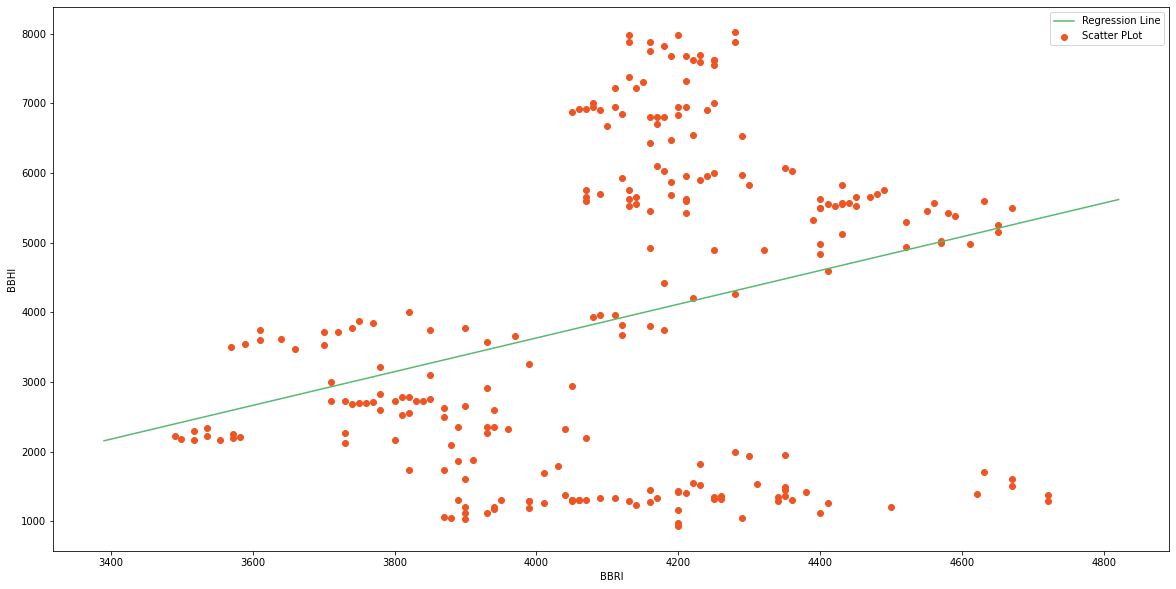

In [13]:
#Plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

#Ploting line
plt.plot(x,y, color='#58b970', label = 'Regression Line')

#PLoting Scatter Points
plt.scatter(X,Y, c='#ef5423', label='Scatter PLot')

plt.xlabel('BBRI')
plt.ylabel('BBHI')
plt.legend()
plt.show()

# **R Squared**

In [14]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.09056521956618302
